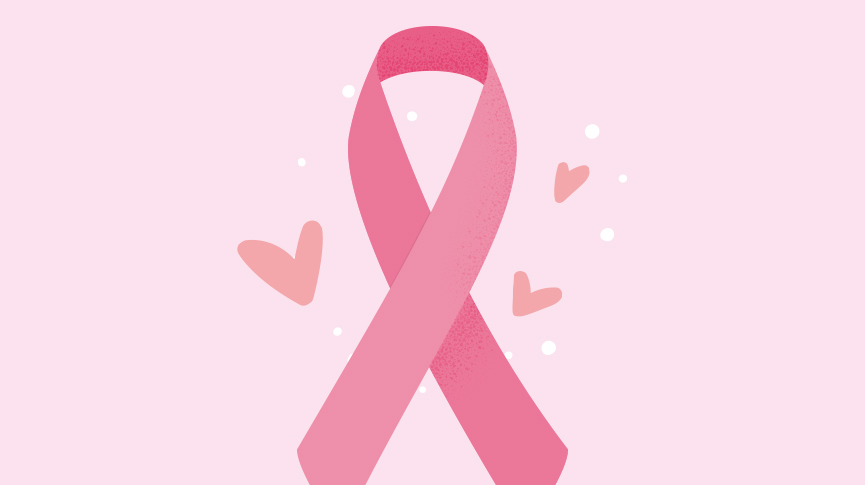

<center><h1 style = "background:#F8BBD0;border:0">Introduction</h1></center>
<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">The aim of the project is to determine whether the tumor is benign or malignant in people diagnosed with breast cancer. While making this determination, we will make use of the features in our data.</p>

<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">First, we examined the data in detail.We detected missing data and outliers. Later, we made visualizations using the plotly library.We gave information about the graphics.We used different visualization techniques.Finally, we determined the wrong classification we made and finalized the notebook. </p>
    

<h2 style = "background:#F8BBD0;border:0">Content :</h2>

<ul>
    <li style = "color:#EC407A;font-size:15px"> <a href = "#1" style = "color:black;font-weight:bold"> Load and Check Data </a> </li>
    <li style = "color:#EC407A;font-size:15px"> <a href = "#2" style = "color:black;font-weight:bold"> Clening Data and Analysis </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#3" style = "color:black;font-weight:bold"> Exploratory Data Analysis (EDA) </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#4" style = "color:black;font-weight:bold"> Outlier Detection </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#5" style = "color:black;font-weight:bold"> Train - Test Split </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#6" style = "color:black;font-weight:bold"> Standrization </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#7" style = "color:black;font-weight:bold"> Bassic KNN method </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#8" style = "color:black;font-weight:bold"> KNN Best Paramters </a> </li>
    <li style = "color:#EC407A;font-size:15px"> <a href = "#9" style = "color:black;font-weight:bold"> PCA ( Principal Component Analysis) </a> </li>
    <li style = "color:#EC407A;font-size:15px"> <a href = "#10" style = "color:black;font-weight:bold"> NCA (Neighborhood Components Analysis) </a> </li> 
    <li style = "color:#EC407A;font-size:15px"> <a href = "#11" style = "color:black;font-weight:bold"> Which is the wrong classification made ? </a> </li>
    <li style = "color:#EC407A;font-size:15px"> <a href = "#12" style = "color:black;font-weight:bold"> CONCLUSION </a> </li>
  
    
</ul>
    


<h2 style = "background:#F8BBD0;border:0">Import Libraries</h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# warning library
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id ='1' ></a>
<h2 style = "background:#F8BBD0;border:0">Load and Check Data </h2>

In [ ]:
cancer_data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [ ]:
# we are browsing the data
cancer_data.head()

In [ ]:
# the columns 
cancer_data.columns

<a id ='2' ></a>
<h2 style = "background:#F8BBD0;border:0"> Clening Data and Analysis </h2>

In [ ]:
# We drop the columns we cannot use
cancer_data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [ ]:
# change the title of the feature
cancer_data = cancer_data.rename(columns = {"diagnosis":"target"})

In [ ]:
cancer_data.head()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > We control our transaction over our data. </p> </li>
</ul>

In [ ]:
# we are looking at the size of our data.
cancer_data.shape

In [ ]:
cancer_data.info()

In [ ]:
# statistical summary of our data
cancer_data.describe()

In [ ]:
sns.countplot(cancer_data["target"])
print(cancer_data.target.value_counts())

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > We look at how many benign, how many malign tumors there are </p> </li>
      <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > B --> Benign (357) </p> </li>
          <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > M --> Malignant (212) </p> </li>
</ul>

In [ ]:
cancer_data["target"] = [1 if i.strip() == "M" else 0 for i in cancer_data.target] 

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > We convert our target property to int values. </p> </li>
        <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > M --> 1 </p> </li>
        <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > B --> 0 </p> </li>
</ul>

<a id ='3' ></a>
<h2 style = "background:#F8BBD0;border:0"> Exploratory Data Analysis (EDA) </h2>

In [ ]:
corr_matrix = cancer_data.corr()

sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > We draw the relationship matrix and examine the relationships between properties. </p> </li>
        <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > If the relation between properties is 1 it means that it is true and -1 means it is inversely proportional. </p> </li>
</ul>

In [ ]:
threshold = 0.75 
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(cancer_data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > In order to see the relationship a little better, we put a threshold </p> </li>
</ul>

In [ ]:
data_melted = pd.melt(cancer_data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90) 
plt.show()

In [ ]:
#pair plot
sns.pairplot(cancer_data[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

<a id ='4' ></a>
<h2 style = "background:#F8BBD0;border:0"> Outlier Detection </h2>

In [ ]:
y = cancer_data.target
x = cancer_data.drop(["target"], axis = 1)

columns = x.columns.tolist()
columns

In [ ]:
clf = LocalOutlierFactor()

# We see if it is outlier or not, -1 is outlier
y_pred = clf.fit_predict(x)

# we need outlier factor values 
X_score = clf.negative_outlier_factor_

In [ ]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >  We make the data DataFrame to see the outliers better. </p> </li>
</ul>

In [ ]:
# threshold
# It will show us the ones with outlier value above 2.5

threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
outlier_index

In [ ]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue", s = 50, label = "outliers")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = "k", s = 3, label = "Data Points")

# We do normalization for the plotting process
radius = (X_score.max()- X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()


<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >  We detected outliers above 2.5 </p> </li>
        <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >  You can view this outlier from the graph above. </p> </li>
</ul>

In [ ]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > We subtract the value we determined above from the data. </p> </li>
</ul>

<a id ='5' ></a>
<h2 style = "background:#F8BBD0;border:0"> Train - Test Split </h2>

In [ ]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > 
We divide our data into two as train and test. </p> </li>
</ul>

<a id ='6' ></a>
<h2 style = "background:#F8BBD0;border:0"> Standrization </h2>

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train

In [ ]:
# box plot 
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# pair plot 
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > 
We standardize our data. </p> </li>
        <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > 
We don't want big differences between features. Because, this affects the model badly. </p> </li>
</ul>

<a id ='7' ></a>
<h2 style = "background:#F8BBD0;border:0"> Bassic KNN method </h2>

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)

print("Score : ", score)
print("Basic KNN Acc : ", acc)

plot_confusion_matrix(knn, X_test, Y_test, cmap= "RdPu")  
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We created the KNN model to make predictions. </p> </li>
        <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > 
Then, we made an estimate and looked at our success results. </p> </li>
     <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" > 
Finally, we saw how many wrong guesses we made using a confusion matrix. </p> </li>
</ul>

<a id ='8' ></a>
<h2 style = "background:#F8BBD0;border:0"> KNN Best Paramters </h2>

In [ ]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score : {} with paremeters : {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    
    plot_confusion_matrix(knn, x_test, y_test, cmap= "RdPu")  
    plt.title("Test Confusion Matrix", color = "Darkred")
    plt.show()
    
    plot_confusion_matrix(knn, x_train, y_train, cmap= "RdPu")  
    plt.title("Train Confusion Matrix", color = "Darkred")
    plt.show()
       
    return grid


<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We wrote a function to find the best parameters of our Knn model. </p> </li>
</ul>

In [ ]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We sent our data to the function we created above and displayed the results. </p> </li>
</ul>

<a id ='9' ></a>
<h2 style = "background:#F8BBD0;border:0"> PCA ( Principal Component Analysis) </h2>

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2) 
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA : p1 vs p2")

X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)


<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We trained our model again by applying PCA (Principal Component Analysis). </p> </li>
</ul>

In [ ]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >The success and confusion matrix of our data obtained as a result of PCA (Principal Component Analysis). </p> </li>
</ul>

In [ ]:
# We choose 4 colors
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We take a look at our classification resulting from PCA (Principal Component Analysis). </p> </li>
</ul>

<a id ='10' ></a>
<h2 style = "background:#F8BBD0;border:0"> NCA (Neighborhood Components Analysis) </h2>

In [ ]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We trained our model again by applying NCA (Neighborhood Components Analysis). </p> </li>
</ul>

In [ ]:
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >The success and confusion matrix of our data obtained as a result of NCA (Neighborhood Components Analysis). </p> </li>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >As a result of the NCA (Neighborhood Components Analysis), we saw that we had only one wrong classification. </p> </li>
</ul>

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >We take a look at our classification resulting from NCA (Neighborhood Components Analysis). </p> </li>
</ul>

<a id ='11' ></a>
<h2 style = "background:#F8BBD0;border:0"> Which is the wrong classification made ? </h2>

In [ ]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)


test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 500)
plt.show()

<ul>
    <li  style = "color:#EC407A" > <p style = "color:black;font-weight:bold" >we detected the wrong classification and visualize. </p> </li>
</ul>

<a id ='12' ></a>
<h2 style = "background:#F8BBD0;border:0"> CONCLUSION </h2>

<ul>
    <li>Seaborn tutorial for beginner : <a href = 'https://www.kaggle.com/rafetcan/visualization-tutorial-with-seaborn'> https://www.kaggle.com/rafetcan/visualization-tutorial-with-seaborn </a> </li>
    <li>Plotly tutorial for beginner : <a href = 'https://www.kaggle.com/rafetcan/plotly-tutorial-for-beginners'> https://www.kaggle.com/rafetcan/plotly-tutorial-for-beginners </a> </li>
</ul>

<p style = "font-size:15px;text-indent:6px;"> If you have any questions or suggestions I would be happy to hear </p>